# Tourism Revenue Trends: East African Community Countries from 1995 to 2018



In this notebook we make an analysis of the East African Community countries revenue obtained from Tourism sector from the years 1995 to 2018. We do some visualizations in plotly and draw some useful conclusions. Included in this notebook are the followings

The data is obtained from quandl.
The following will be covered


   - Getting the data from quandl: 
   - Visualizing the data
       - Comparison of `Inbound: Travel - USD (Millions)` among countries in the association 
       - Comparison of `Outbound: Travel - USD (Millions)` among countries in the association 
   - Conclusion

In [104]:
#Packages used

%pip install quandl
import quandl as ql
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression as lr

Note: you may need to restart the kernel to use updated packages.


## 1.  Getting the data
The data is extracted from quandl. A token is needed to get the data.

In [105]:
tza = ql.get("UTOR/TOR_TZA", authtoken="-K72dVjJWtM7ztFbz-95") # Tanzania data
ken = ql.get("UTOR/TOR_KEN", authtoken="-K72dVjJWtM7ztFbz-95") # Kenya data
uga = ql.get("UTOR/TOR_UGA", authtoken="-K72dVjJWtM7ztFbz-95") # Uganda data

Now we view the data columns and rows

In [106]:
print('Tanzania: ', tza.shape,'\n')
print('Kenya: ', ken.shape,'\n')
print('Uganda', uga.shape,'\n')

Tanzania:  (24, 8) 

Kenya:  (23, 7) 

Uganda (24, 8) 



In [107]:
tza.head(3)

,Inbound: Arrivals - Thousands (TF),Inbound: Tourism expenditure in the country - US$ Mn (IMF),Inbound: Travel - US$ Mn (IMF),Inbound: Passenger transport - US$ Mn (IMF),Outbound: Departures - Thousands (TF),Outbound: Tourism expenditure in other countries - US$ Mn (IMF),Outbound: Travel - US$ Mn (IMF),Outbound: Passenger transport - US$ Mn (IMF)
Date,,,,,,,,
1995-12-31,285.0,NaN,502.0,NaN,157.0,NaN,360.0,NaN
1996-12-31,315.0,NaN,473.0,NaN,148.0,NaN,412.0,NaN
1997-12-31,347.0,343.0,339.0,4.0,NaN,424.0,407.0,17.0


In [108]:
ken.head(3)

,Inbound: Arrivals - Thousands (TF),Inbound: Tourism expenditure in the country - US$ Mn (IMF),Inbound: Travel - US$ Mn (IMF),Inbound: Passenger transport - US$ Mn (IMF),Outbound: Tourism expenditure in other countries - US$ Mn (IMF),Outbound: Travel - US$ Mn (IMF),Outbound: Passenger transport - US$ Mn (IMF)
Date,,,,,,,
1995-12-31,918.0,785.0,423.0,362.0,230.0,192.0,38.0
1996-12-31,947.0,823.0,462.0,361.0,205.0,169.0,36.0
1997-12-31,928.0,1077.0,655.0,422.0,152.0,145.0,7.0


In [109]:
uga.head(3)

,Inbound: Arrivals - Thousands (TF),Inbound: Tourism expenditure in the country - US$ Mn (IMF),Inbound: Travel - US$ Mn (IMF),Inbound: Passenger transport - US$ Mn (IMF),Outbound: Departures - Thousands (TF),Outbound: Tourism expenditure in other countries - US$ Mn (IMF),Outbound: Travel - US$ Mn (IMF),Outbound: Passenger transport - US$ Mn (IMF)
Date,,,,,,,,
1995-12-31,160.0,NaN,78.0,NaN,NaN,NaN,80.0,NaN
1996-12-31,174.0,NaN,117.0,NaN,NaN,NaN,135.0,NaN
1997-12-31,175.0,NaN,135.0,NaN,148.0,NaN,113.0,NaN


### Handling missing data

- Kenya has only 23 rows while the other two countries i.e., Tanzania and Uganda have 24 rows. So we add a new row by taking the average of the two previous rows.

- Uganda has 5 missing values for `Outbound: Travel - US$ Mn (IMF)` column. To deal with this problem we use a similar technique. However, we take only the first 4 values and play around with the average.


In [110]:
# tza.columns

In [111]:
# tanzanian_data = tza[['Inbound: Travel - US$ Mn (IMF)', 'Outbound: Travel - US$ Mn (IMF)']]
# tanzanian_data.columns = ['Income', 'Expenditture']
# tanzanian_data.head(2)

In [112]:
# kenya_data = ken[['Inbound: Travel - US$ Mn (IMF)', 'Outbound: Travel - US$ Mn (IMF)']]
# kenya_data.columns = ['Income', 'Expenditture']
# kenya_data.head(2)

In [113]:
#Adding the last missing row in `ken` data frame
new_row = pd.DataFrame([[(ken.iloc[21,0]+ken.iloc[22,0])/2, (ken.iloc[21,1]+ken.iloc[22,1])/2,
                         (ken.iloc[21,2]+ken.iloc[22,2])/2, (ken.iloc[21,3]+ken.iloc[22,3])/2,
                         'NaN', (ken.iloc[21,5]+ken.iloc[22,5])/2, 'NaN']],
                       columns=['Inbound: Arrivals - Thousands (TF)',
                                'Inbound: Tourism expenditure in the country - US$ Mn (IMF)',
                                'Inbound: Travel - US$ Mn (IMF)',
                                'Inbound: Passenger transport - US$ Mn (IMF)',
                                'Outbound: Tourism expenditure in other countries - US$ Mn (IMF)',
                                'Outbound: Travel - US$ Mn (IMF)',
                                'Outbound: Passenger transport - US$ Mn (IMF)'])

In [114]:
ken = pd.concat([ken,new_row], ignore_index=False)

In [115]:
#Filling out the `NaN`s values in `uga` dataframe
uga.iloc[4,6] = (uga.iloc[0,6]+uga.iloc[1,6])/2
uga.iloc[5,6] = (uga.iloc[1,6]+uga.iloc[2,6])/2
uga.iloc[6,6] = (uga.iloc[2,6]+uga.iloc[3,6])/2
uga.iloc[7,6] = (uga.iloc[4,6]+uga.iloc[5,6])/2
uga.iloc[8,6] = (uga.iloc[5,6]+uga.iloc[6,6])/2

In [116]:
#print(tza[['Inbound: Travel - US$ Mn (IMF)','Outbound: Travel - US$ Mn (IMF)']])
#print(ken[['Inbound: Travel - US$ Mn (IMF)','Outbound: Travel - US$ Mn (IMF)']])
#print(uga[['Inbound: Travel - US$ Mn (IMF)','Outbound: Travel - US$ Mn (IMF)']])

## 2. Visualization 
### 2.1 Comparison of Inbound: Travel - USD (Millions) among countries in the association 

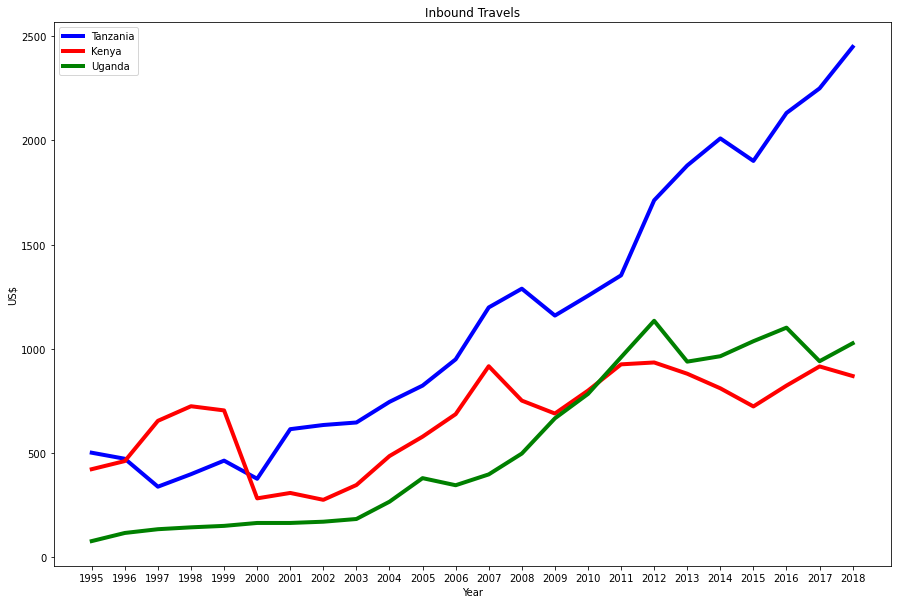

In [117]:
tza['Year'] = tza.index.year
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)
ax1.plot(tza['Year'], tza['Inbound: Travel - US$ Mn (IMF)'], marker='', color='blue', linewidth=4, label='Tanzania')
ax1.plot(tza['Year'], ken['Inbound: Travel - US$ Mn (IMF)'], marker='', color='red', linewidth=4, label='Kenya')
ax1.plot(tza['Year'], uga['Inbound: Travel - US$ Mn (IMF)'], marker='', color='green', linewidth=4, label='Uganda')
ax1.set_xticks(tza['Year'])
plt.title('Inbound Travels')
plt.xlabel('Year')
plt.ylabel('US$')
plt.legend()

### 2.2 Comparison of Outbound: Travel - USD (Millions) among countries in the association 

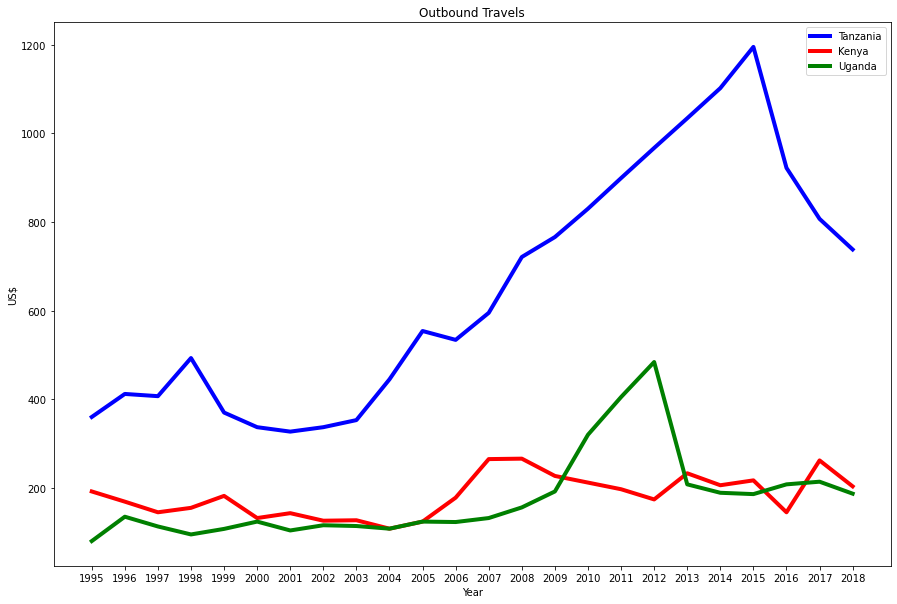

In [118]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)
ax1.plot(tza['Year'], tza['Outbound: Travel - US$ Mn (IMF)'], marker='', color='blue', linewidth=4, label='Tanzania')
ax1.plot(tza['Year'], ken['Outbound: Travel - US$ Mn (IMF)'], marker='', color='red', linewidth=4, label='Kenya')
ax1.plot(tza['Year'], uga['Outbound: Travel - US$ Mn (IMF)'], marker='', color='green', linewidth=4, label='Uganda')
ax1.set_xticks(tza['Year'])
plt.title('Outbound Travels')
plt.xlabel('Year')
plt.ylabel('US$')
plt.legend()

The two figures above reveal that Tanzania is leading in both revenues, while Kenya and Uganda have almost the same revenues for both cases.

Now we are predicting the revenues for the 23 years to come (from 2019 to 2042)

In [119]:
tza_in = np.array(tza['Inbound: Travel - US$ Mn (IMF)']).reshape(-1,1)
tza_out = np.array(tza['Outbound: Travel - US$ Mn (IMF)'])
model = lr().fit(tza_in,tza_out)
print('_______ Tanzania _______\n')
#Coefficient of determination r_sq
print('r_sq = ', model.score(tza_in,tza_out),'\n')
#Intercept
print('Intercept = ', model.intercept_,'\n')
#Slope
print('Slope = ', model.coef_,'\n\n')
tza_pred = model.predict(tza_in)

print('_______ Kenya _______\n')
ken_in = np.array(ken['Inbound: Travel - US$ Mn (IMF)']).reshape(-1,1)
ken_out = np.array(ken['Outbound: Travel - US$ Mn (IMF)'])
model = lr().fit(ken_in,ken_out)
#Coefficient of determination r_sq
print('r_sq = ', model.score(ken_in,ken_out),'\n')
#Intercept
print('Intercept = ', model.intercept_,'\n')
#Slope
print('Slope = ', model.coef_,'\n\n')
ken_pred = model.predict(ken_in)

print('_______ Uganda _______\n')
uga_in = np.array(uga['Inbound: Travel - US$ Mn (IMF)']).reshape(-1,1)
uga_out = np.array(uga['Outbound: Travel - US$ Mn (IMF)'])
model = lr().fit(uga_in,uga_out)
#Coefficient of determination r_sq
print('r_sq = ', model.score(uga_in,uga_out),'\n')
#Intercept
print('Intercept = ', model.intercept_,'\n')
#Slope
print('Slope = ', model.coef_,'\n\n')
uga_pred = model.predict(uga_in)

_______ Tanzania _______

r_sq =  0.7265430129680654 

Intercept =  246.58253049721066 

Slope =  [0.34782205] 


_______ Kenya _______

r_sq =  0.4518615544440049 

Intercept =  86.41484203401984 

Slope =  [0.14481285] 


_______ Uganda _______

r_sq =  0.5536528269075816 

Intercept =  75.10182386585014 

Slope =  [0.18985624] 




No handles with labels found to put in legend.


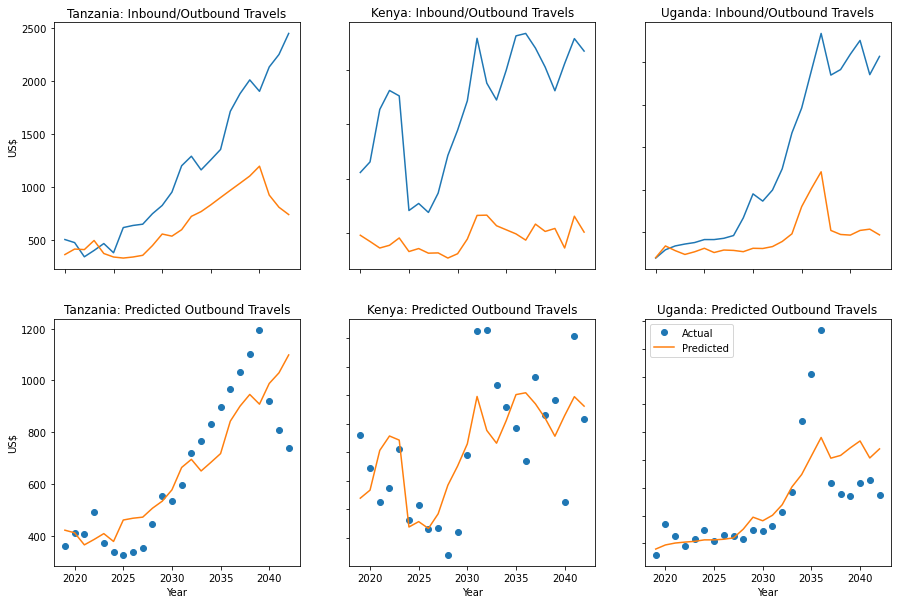

In [120]:
yr = np.array(np.arange(2019,2043))
fig, axs = plt.subplots(2, 3, figsize=(15,10))
axs[0, 0].plot(tza['Year'], tza['Inbound: Travel - US$ Mn (IMF)'], label='Inbound')
axs[0, 0].plot(tza['Year'], tza['Outbound: Travel - US$ Mn (IMF)'], label='Outbound')
axs[0, 0].set_title('Tanzania: Inbound/Outbound Travels')
axs[0, 1].plot(tza['Year'], ken['Inbound: Travel - US$ Mn (IMF)'], label='Inbound')
axs[0, 1].plot(tza['Year'], ken['Outbound: Travel - US$ Mn (IMF)'], label='Inbound')
axs[0, 1].set_title('Kenya: Inbound/Outbound Travels')
axs[0, 2].plot(tza['Year'], uga['Inbound: Travel - US$ Mn (IMF)'], label='Inbound')
axs[0, 2].plot(tza['Year'], uga['Outbound: Travel - US$ Mn (IMF)'], label='Inbound')
axs[0, 2].set_title('Uganda: Inbound/Outbound Travels')
plt.legend(loc='best')

axs[1, 0].plot(yr, tza_out, 'o')
axs[1, 0].plot(yr, tza_pred)
axs[1, 0].set_title('Tanzania: Predicted Outbound Travels')
axs[1, 1].plot(yr, ken_out, 'o')
axs[1, 1].plot(yr, ken_pred)
axs[1, 1].set_title('Kenya: Predicted Outbound Travels')
axs[1, 2].plot(yr, uga_out, 'o', label='Actual')
axs[1, 2].plot(yr, uga_pred, label='Predicted')
axs[1, 2].set_title('Uganda: Predicted Outbound Travels')
#axs.legend(loc='upper left', frameon=False)
plt.legend(loc='best')


for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='US$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()